In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Meta 데이터 확인 및 2016년 데이터 추출

## 리뷰데이터

데이터 불러오기

In [ ]:
df = pd.read_csv('AMAZON_FASHION.csv', encoding = 'CP949')
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
883631,5,True,"02 21, 2017",A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200,NaN,NaN,NaN
883632,5,True,"11 25, 2016",A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000,2.0,NaN,NaN
883633,3,True,"11 10, 2016",A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,1478736000,NaN,NaN,NaN
883634,3,True,"11 10, 2016",A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,1478736000,NaN,NaN,NaN


In [ ]:
drop = ['reviewerName', 'summary', 'unixReviewTime', 'vote', 'style', 'image']
df = df.drop(drop, axis = 1)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Exactly what I needed.
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,"I agree with the other review, the opening is ..."
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Love these... I am going to order another pack...
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,too tiny an opening
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Okay


In [ ]:
df = df.dropna()
df.isnull().sum()

overall       0
verified      0
reviewTime    0
reviewerID    0
asin          0
reviewText    0
dtype: int64

리뷰 연도 추가

In [ ]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year
df

,overall,verified,reviewTime,reviewerID,asin,reviewText,year
0,5,True,2014-10-20,A1D4G1SNUZWQOT,7106116521,Exactly what I needed.,2014
1,2,True,2014-09-28,A3DDWDH9PX2YX2,7106116521,"I agree with the other review, the opening is ...",2014
2,4,False,2014-08-25,A2MWC41EW7XL15,7106116521,Love these... I am going to order another pack...,2014
3,2,True,2014-08-24,A2UH2QQ275NV45,7106116521,too tiny an opening,2014
4,3,False,2014-07-27,A89F3LQADZBS5,7106116521,Okay,2014
...,...,...,...,...,...,...,...
883631,5,True,2017-02-21,A1ZSB2Q144UTEY,B01HJHTH5U,I absolutely love this dress!! It's sexy and ...,2017
883632,5,True,2016-11-25,A2CCDV0J5VB6F2,B01HJHTH5U,I'm 5'6 175lbs. I'm on the tall side. I wear a...,2016
883633,3,True,2016-11-10,A3O90PACS7B61K,B01HJHTH5U,Too big in the chest area!,2016
883634,3,True,2016-11-10,A2HO94I89U3LNH,B01HJHF97K,"Too clear in the back, needs lining",2016


True False 개수 확인

In [ ]:
verifiedTrue = df.loc[df['verified']==True]
verifiedFalse = df.loc[df['verified']==False]
print("True : " + str(verifiedTrue['verified'].value_counts()))
print("False : " + str(verifiedFalse['verified'].value_counts()))

True : True    827526
Name: verified, dtype: int64
False : False    54876
Name: verified, dtype: int64


False 삭제

In [ ]:
df = df.loc[df['verified']==True]
df = df.sort_values(by='overall', ascending=False)
df

,overall,verified,reviewTime,reviewerID,asin,reviewText,year
0,5,True,2014-10-20,A1D4G1SNUZWQOT,7106116521,Exactly what I needed.,2014
481708,5,True,2017-04-22,A1F9ULJDCX5RJ3,B00GGE1P9E,"warmer than I expected it to be, but it was a ...",2017
481727,5,True,2014-12-27,A30SFOOWLUGX5L,B00GGFOJ0A,Bought this shirt for my husband and he loves ...,2014
481726,5,True,2015-01-07,A2PG39KJXI7QRM,B00GGFMXVC,"This is a great jacket!! It is very cute, and ...",2015
481725,5,True,2015-01-27,AYO3HNUHOZ5G9,B00GGFMXVC,My daughter loved it --it was nicer than the o...,2015
...,...,...,...,...,...,...,...
799441,1,True,2018-07-20,A307HMS0059DH2,B01C9063EK,Beautiful color but came broke,2018
799439,1,True,2017-08-24,AU6U1IZ7EOJMO,B01C91NJZA,Maybe fine for a small child with very small l...,2017
264647,1,True,2016-11-23,A323U595RK2XGF,B00VY5HC9C,I understand for the price paid you can't get ...,2016
37916,1,True,2018-01-12,A1EXTHVX2NOYX5,B000YFSR5G,"To big all around, legs, length, waist, must r...",2018


평점 전체 분포

In [ ]:
overall = df['overall'].value_counts().to_frame('cnt')
overall = overall.sort_index(ascending=False)
overall = overall.rename(columns = {'index':'overall'})
overall

,cnt
5,435043
4,139418
3,91609
2,61131
1,100325


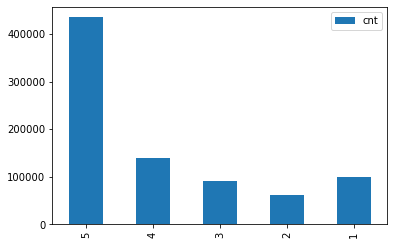

In [ ]:
overall.plot(kind = 'bar')
plt.show()

리뷰 일자 최대 최소

In [ ]:
reviewTimeMin = df['reviewTime'].min()
reviewTimeMax = df['reviewTime'].max()
print(str(reviewTimeMin)+' ~ '+str(reviewTimeMax))

2003-07-07 00:00:00 ~ 2018-10-01 00:00:00


리뷰 일자별 평점 분포

In [ ]:
result = pd.crosstab(index=df['year'], columns=df['overall'])
result = result.T
result = result.sort_index(ascending=False)
result

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
overall,,,,,,,,,,,,,,,,
5,1,7,21,58,351,505,770,1187,1721,4279,13688,37800,97849,150667,93512,32627
4,1,2,7,16,141,169,239,384,560,1328,4808,14121,33359,49645,26507,8131
3,0,0,6,8,63,81,112,179,271,733,2856,8887,22152,33046,17605,5610
2,0,0,0,3,39,42,68,142,219,507,1831,5613,14674,22576,11728,3689
1,1,1,4,7,43,57,78,157,267,668,2220,8240,24881,38211,19342,6148


리뷰ID

In [ ]:
df['reviewerID'].describe()

count             827526
unique            705943
top       A3G5KDMFNRUXHB
freq                  40
Name: reviewerID, dtype: object

In [ ]:
id = df['reviewerID'].value_counts().to_frame('cnt')
id = id.sort_values(by='cnt', ascending=False)
id = id.rename(columns = {'index':'reviewerID'})
id

,cnt
A3G5KDMFNRUXHB,40
A3JBQHQZEZPQK4,36
A1RRX286ZRI830,32
A2PBHVTPTIIGKR,31
A2GP4EJIAA2OE0,28
...,...
AJ6JLVBDF7HXG,1
ACYB1GK429O9D,1
A39R8T4AQNB1XE,1
A2B1TX8FLCO616,1


In [ ]:
idNot1 = id.loc[id['cnt']>1]
idNot1

,cnt
A3G5KDMFNRUXHB,40
A3JBQHQZEZPQK4,36
A1RRX286ZRI830,32
A2PBHVTPTIIGKR,31
A2GP4EJIAA2OE0,28
...,...
A3JB9I6WABM04M,2
A3IPDGNC7YSNXH,2
AJ24WRGOFXIIP,2
A353TVLKRC6OID,2


In [ ]:
print("전체 ID 개수 : "+str(len(id)))
print("2개 이상 리뷰 작성 ID 개수 : "+str(len(idNot1)))

전체 ID 개수 : 705943
2개 이상 리뷰 작성 ID 개수 : 86153


asin

In [ ]:
asin = df['asin'].value_counts().to_frame('cnt')
asin = asin.sort_values(by='cnt', ascending=False)
asin = asin.rename(columns = {'index':'asin'})
asin

,cnt
B000V0IBDM,4275
B000KPIHQ4,4266
B00I0VHS10,3603
B00RLSCLJM,3572
B000YFSR5G,2416
...,...
B00GCB0X80,1
B014Q6SVMW,1
B003LNCTN4,1
B007GJOGVC,1


In [ ]:
asinNot1 = id.loc[id['cnt']>1]
asinNot1

,cnt
A3G5KDMFNRUXHB,40
A3JBQHQZEZPQK4,36
A1RRX286ZRI830,32
A2PBHVTPTIIGKR,31
A2GP4EJIAA2OE0,28
...,...
A3JB9I6WABM04M,2
A3IPDGNC7YSNXH,2
AJ24WRGOFXIIP,2
A353TVLKRC6OID,2


In [ ]:
print("전체 asin 개수 : "+str(len(asin)))
print("2개 이상 리뷰 작성 asin 개수 : "+str(len(asinNot1)))

전체 asin 개수 : 179313
2개 이상 리뷰 작성 asin 개수 : 86153


## meta - asin을 제품이름으로 바꿔보자

데이터 불러오기

In [ ]:
meta = pd.read_csv('meta_AMAZON_FASHION.csv')
meta

C:\Users\ParkChunSoo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,198,199,200,203,204,205,207,208,209,210,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,

,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,...,Unnamed: 1345,Unnamed: 1346,Unnamed: 1347,Unnamed: 1348,Unnamed: 1349,Unnamed: 1350,Unnamed: 1351,Unnamed: 1352,Unnamed: 1353,Unnamed: 1354
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),['Product Dimensions:\n \n8...,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,764443682,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,['Package Dimensions:\n \n8...,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,['For the professional or amateur magician. R...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,['Package Dimensions:\n \n8...,"19,734,184inClothing,ShoesJewelry(",5 star,1940735033,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aether & Empire #1 - 2016 First Printing Comic...,NaN,['Package Dimensions:\n \n1...,"10,558,646inClothing,Shoesamp;Jewelry(",5 star,1940967805,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,$4.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393618,JT Women's Elegant Off Shoulder Chiffon Maxi L...,JT,NaN,"9,835,890inClothing,ShoesJewelry(",5 star,B01HJGXL4O,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393619,Microcosm Retro Vintage Black Crochet Lace One...,Microcosm,['Package Dimensions:\n \n7...,"11,390,771inClothing,ShoesJewelry(",5 star5 star (0%),B01HJHF97K,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393620,Lookatool Classic Plain Vintage Army Military ...,Lookatool,"['Cotton+Polyester', 'Imported', 'Item type:Ba...","972,275inClothing,ShoesJewelry(",5 star,B01HJGJ9LS,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,$8.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393621,Edith Windsor Women's Deep V-neck Beaded Sequi...,Edith Windsor,['Product Dimensions:\n \n9...,"1,964,585inClothing,ShoesJewelry(",5 star,B01HJHTH5U,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
meta.columns

asin, title 추출하기

In [ ]:
dfMeta = pd.DataFrame({
    'title' : meta['title'],
    'asin' : meta['asin'],
})
dfMeta

In [ ]:
dfMeta.isnull().sum()

In [ ]:
dfMeta = dfMeta.dropna()
dfMeta.isnull().sum()

In [ ]:
dfMeta['asin'].value_counts().head(50)

In [ ]:
asinMeta = dfMeta['asin'].value_counts().to_frame('cnt')
asinMeta = asinMeta.sort_values(by='cnt', ascending=False)
asinMeta['asin'] = asinMeta.index
asinMeta = asinMeta.reset_index(drop=True)
asinMeta = asinMeta.loc[asinMeta['cnt']<=2]
asinMeta

In [ ]:
dfMeta = pd.merge(asinMeta, dfMeta, on='asin')
dfMeta

In [ ]:
dfMeta = dfMeta.drop('cnt', axis=1)
dfMeta

리뷰데이터와 메타데이터 합치기

In [ ]:
df = pd.merge(df, dfMeta, on='asin')
df = df.drop('asin', axis=1)
df

## 합친 데이터로 다시

In [ ]:
overall = df['overall'].value_counts().to_frame('cnt')
overall = overall.sort_index(ascending=False)
overall = overall.rename(columns = {'index':'overall'})
overall

,cnt
5,431204
4,138325
3,91105
2,60846
1,100026


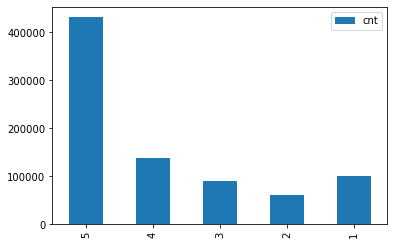

In [ ]:
overall.plot(kind = 'bar')
plt.show()

In [ ]:
reviewTimeMin = df['reviewTime'].min()
reviewTimeMax = df['reviewTime'].max()
print(str(reviewTimeMin)+' ~ '+str(reviewTimeMax))

2003-07-07 00:00:00 ~ 2018-10-01 00:00:00


In [ ]:
result = pd.crosstab(index=df['year'], columns=df['overall'])
result = result.T
result = result.sort_index(ascending=False)
result

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
overall,,,,,,,,,,,,,,,,
5,2,14,36,73,394,525,751,1128,1637,4162,13373,37384,97185,149593,92677,32270
4,2,4,12,21,155,177,235,360,528,1289,4688,13979,33152,49371,26297,8055
3,0,0,8,10,76,84,103,178,249,720,2817,8805,22052,32930,17515,5558
2,0,0,0,6,47,43,66,140,209,497,1800,5574,14615,22514,11675,3660
1,2,2,8,8,45,56,78,151,259,660,2199,8205,24841,38125,19278,6109


In [ ]:
dfTemp1 = df.loc[df['year']==2016]
dfTemp1O5 = []
for i in range (0, 5):
    temp = dfTemp1.loc[dfTemp1['overall'] == i+1]
    dfTemp1O5.append(temp)
    dfTemp1O5[i] = dfTemp1O5[i].sample(22000)
dfTemp1 = pd.concat(dfTemp1O5)
dfTemp1

,overall,verified,reviewTime,reviewerID,reviewText,year,title
509144,1,True,2016-07-16,A6JFRI7IHQ4UH,"Terrible , small , cheaply made, and even more...",2016,Sterling Silver Comedy Tragedy Mask Pendant Ne...
819672,1,True,2016-05-10,A2SAE2QVCE69B9,This product was made of poor quality items.,2016,Rosemarie Collections Women's Take me to the B...
683049,1,True,2016-04-26,A27F0VT6K7AMSH,"Horrible shirt! It fits like a sack, the fabri...",2016,Very Cute Baby Lifter - Reps for Mom Funny Pre...
636676,1,True,2016-07-26,A3BSPW828VQ3VK,Broke after 60 days.,2016,Couples Infinity Pendant Name Necklace in Ster...
321464,1,True,2016-09-04,A1J8SYC0N9050V,Looks cheep. Poor quality.,2016,Ularmo 2015 New Hot Fashion Women Bang Bang Mu...
...,...,...,...,...,...,...,...
706849,5,True,2016-12-15,A1PNL6AM8X2LEQ,Bought this for my best friend for Christmas a...,2016,Nautical Anchor Gemmed Belly Ring 316L Surgica...
387092,5,True,2016-06-03,AKNCSVPI6GGAV,This style is hard to find! My husband doesn'...,2016,New Moga Lamb Skin Leather Europian Mens Walle...
505958,5,True,2016-03-28,A25YYG8GJYLPBI,"Slightly tight on my 14-month old neice, but s...",2016,Frogwill Infant Toddler Girl Baby Handmade Kni...
730763,5,True,2016-05-03,A3U68Z44KZ7VJL,Nice,2016,Polka Dots 2 Piece Pajama 18-24 Months


In [ ]:
dfTemp2 = df.loc[df['year']==2016]
dfTemp2O5 = []
for i in range (0, 5):
    temp = dfTemp2.loc[dfTemp2['overall'] == i+1]
    dfTemp2O5.append(temp)
    dfTemp2O5[i] = dfTemp2O5[i].sample(11000)
dfTemp2 = pd.concat(dfTemp2O5)
dfTemp2

,overall,verified,reviewTime,reviewerID,reviewText,year,title
704129,1,True,2016-09-29,AGXF4POVE77Q4,So cheap material,2016,FINEJO Vintage Style Women 2 Pcs Leaf Pattern ...
416135,1,True,2016-06-14,A4QLJU5LZPU5Z,Paper thin... size looks like it's for a tall ...,2016,Tenworld Women Summer Cotton Dress Boho Long M...
487184,1,True,2016-11-25,A1EX77IN2Y8K4K,super cheap,2016,"Phoenix Pendant, Phoenix Necklace, Phoenix Cha..."
414711,1,True,2016-09-15,A1CKP2TSAVZ792,Way too small and way too short. I ended up re...,2016,Caracilia Women Wear to Work Business Party Bo...
742394,1,True,2016-01-28,APM8Y7XSJTNQU,The zipper broke the first time I opened it,2016,Multi-functional Travel Shirt Tie Pouch Organi...
...,...,...,...,...,...,...,...
529232,5,True,2016-08-17,A187XMTLW64CEF,Very comfortable,2016,Ularmo Women's Printed High Waist Fitness Yoga...
474757,5,True,2016-07-04,A1VNCDQ2S0ZG3Z,Love it,2016,Taydey Women's 3/4 Sleeve Floral High Low Chif...
246026,5,True,2016-03-31,A20K73QRTZ9IKP,My boyfriend was intimidated by this sexy ling...,2016,"DLZ stores Women Sexy Lingerie 4pcs Set, Black..."
548915,5,True,2016-07-05,A32FVZC5Z3Z111,This bathing suit fits me perfectly. I love it...,2016,Dearlovers Women Colorful High Wasit Padded Bi...


In [ ]:
dfRes = pd.concat([dfTemp1, dfTemp2])
dfRes = dfRes.reset_index(drop=True)
dfRes

,overall,verified,reviewTime,reviewerID,reviewText,year,title
0,1,True,2016-07-16,A6JFRI7IHQ4UH,"Terrible , small , cheaply made, and even more...",2016,Sterling Silver Comedy Tragedy Mask Pendant Ne...
1,1,True,2016-05-10,A2SAE2QVCE69B9,This product was made of poor quality items.,2016,Rosemarie Collections Women's Take me to the B...
2,1,True,2016-04-26,A27F0VT6K7AMSH,"Horrible shirt! It fits like a sack, the fabri...",2016,Very Cute Baby Lifter - Reps for Mom Funny Pre...
3,1,True,2016-07-26,A3BSPW828VQ3VK,Broke after 60 days.,2016,Couples Infinity Pendant Name Necklace in Ster...
4,1,True,2016-09-04,A1J8SYC0N9050V,Looks cheep. Poor quality.,2016,Ularmo 2015 New Hot Fashion Women Bang Bang Mu...
...,...,...,...,...,...,...,...
164995,5,True,2016-08-17,A187XMTLW64CEF,Very comfortable,2016,Ularmo Women's Printed High Waist Fitness Yoga...
164996,5,True,2016-07-04,A1VNCDQ2S0ZG3Z,Love it,2016,Taydey Women's 3/4 Sleeve Floral High Low Chif...
164997,5,True,2016-03-31,A20K73QRTZ9IKP,My boyfriend was intimidated by this sexy ling...,2016,"DLZ stores Women Sexy Lingerie 4pcs Set, Black..."
164998,5,True,2016-07-05,A32FVZC5Z3Z111,This bathing suit fits me perfectly. I love it...,2016,Dearlovers Women Colorful High Wasit Padded Bi...


In [ ]:
df.to_csv('Amazon_Fashion_Final.csv')